<a href="https://colab.research.google.com/github/nakajitara/kookaon/blob/main/kookaon_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Kookaon***

#cargar dependencias



**Librerías importadas:**

* `pandas`: Librería para manipulación y análisis de datos.
* `sklearn`: Librería para aprendizaje automático.
* `train_test_split`: Función para dividir un conjunto de datos en conjuntos de entrenamiento y prueba.
* `RandomForestRegressor`: Modelo de regresión basado en árboles de decisión.
* `LinearRegression`: Modelo de regresión lineal.
* `matplotlib.pyplot`: Librería para creación de gráficos.
* `seaborn`: Librería para visualización de datos.
* `FontProperties`: Clase para configurar fuentes en gráficos.
* `LabelEncoder`: Clase para codificar etiquetas categóricas.
* `GridSearchCV`: Clase para búsqueda de hiperparámetros mediante validación cruzada.
* `RandomizedSearchCV`: Clase para búsqueda aleatoria de hiperparámetros.
* `numpy`: Librería para computación científica.
* `mean_absolute_error`: Función para calcular el error absoluto medio.
* `mean_squared_error`: Función para calcular el error cuadrático medio.
* `cross_val_score`: Función para calcular la puntuación de validación cruzada.
* `scipy.stats`: Librería para estadística.

**Explicación:**

Este código importa una variedad de bibliotecas para realizar tareas de aprendizaje automático, análisis de datos y visualización de datos.

* Las bibliotecas `pandas` y `sklearn` son esenciales para cualquier proyecto de aprendizaje automático.
* Las bibliotecas `matplotlib.pyplot` y `seaborn` se utilizan para crear gráficos y visualizaciones.
* La biblioteca `LabelEncoder` se utilizo para preprocesar los datos categóricos.
* Las bibliotecas `GridSearchCV` y `RandomizedSearchCV` se utilizan para ajustar los hiperparámetros del modelo.
* Las bibliotecas `mean_absolute_error`, `mean_squared_error` y `cross_val_score` se utilizan para evaluar el rendimiento del modelo.
* La biblioteca `scipy.stats` proporciona funciones estadísticas útiles.
* La biblioteca `joblib` permite guardar el modelo terminado.

In [1]:
#dependencias para importar dataset y definir el modelo
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#librerías para realizar los gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
#Función para establecer el estilo de los gráficos
styles=plt.style.available
print(styles)
plt.style.use('dark_background')
#dependencias para pre-procesar el modelo
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
#dependencias para selección de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Dependencias para validación
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
#Dependencia para guardar el modelo
import joblib

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#Preprocesamiento del conjunto de datos

##Importación, corrección y limpieza de datos de los datasets

**Importar con pandas:**

Se utilizó la función `read_csv` de pandas para importar los datos de los archivos CSV. Esto crea un objeto DataFrame que contiene los datos.

**Visualizar shape, columns y head:**

Se utilizaron las funciones `shape`, `columns` y `head` para visualizar la forma, las columnas y las primeras filas del DataFrame, respectivamente. Esto ayuda a comprender la estructura y el contenido de los datos.

**Identificar valores nulos:**

Se utilizó la función `isnull` para identificar los valores nulos en el DataFrame. Luego, se utilizó la función `sum` para sumar los valores nulos en cada columna. Esto ayuda a identificar las columnas con valores faltantes.

**Corregir valores nulos:**

Se utilizó el método `fillna` para corregir los valores nulos. Este método permite reemplazar los valores nulos con un valor específico, como el valor medio o la mediana de la columna.

**Renombrar las variables:**

Se utilizó el método `rename` para renombrar las variables del DataFrame. Este método permite asignar nuevos nombres a las columnas.

**Convertir variable tempo a int:**

Se utilizó el método `astype` para convertir la variable `tempo` a tipo entero. Este método permite cambiar el tipo de datos de una columna.

**Visualizar nuevamente:**

Se utilizaron nuevamente las funciones `shape`, `columns` y `head` para visualizar la forma, las columnas y las primeras filas del DataFrame después de las correcciones y limpiezas.

**Describir con describe y corr:**

Se utilizaron las funciones `describe` y `corr` para obtener estadísticas descriptivas y calcular las correlaciones entre las variables del DataFrame. Esto ayuda a comprender la distribución de los datos y las relaciones entre las variables.

**Explicación:**

El proceso de corrección y limpieza de datos es esencial para garantizar la calidad de los datos y mejorar el rendimiento de los modelos de aprendizaje automático. Este proceso implica identificar y corregir valores nulos, renombrar variables, convertir tipos de datos y realizar otras transformaciones según sea necesario.

###Dataset 1

####importación

In [2]:
#dataset extraído desde: https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks
basic_dataset_01=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kookaon/datasets_basicos/dataset_01.csv')
print(basic_dataset_01.shape)
print(basic_dataset_01.columns)
basic_dataset_01.head(n=3)

(1159764, 20)
Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.338,0.000050,0.0895,0.145,139.832,158960,4


####Verificar nulos

In [3]:
#verificar si hay valores nulos
basic_dataset_01.isnull().sum()

Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [4]:
#renombrar los valores nulos del dataset
basic_dataset_01.artist_name.fillna('unnamed', inplace=True)
basic_dataset_01.track_name.fillna('untitled', inplace=True)

####Corregir variables

In [5]:
#eliminar variabres innecesarias
basic_dataset_01=basic_dataset_01.drop(['track_id','Unnamed: 0','year'],axis=1)
#converir dtyoes de variables
basic_dataset_01['tempo']=basic_dataset_01['tempo'].astype('int')
basic_dataset_01['is_explicit']=0
#mostrar datos actualizados
print(basic_dataset_01.shape)
print(basic_dataset_01.columns)
basic_dataset_01.head(n=3)

(1159764, 18)
Index(['artist_name', 'track_name', 'popularity', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'is_explicit'],
      dtype='object')


,artist_name,track_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_explicit
0,Jason Mraz,I Won't Give Up,68,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133,240166,3,0
1,Jason Mraz,93 Million Miles,50,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140,216387,4,0
2,Joshua Hyslop,Do Not Let Me Go,57,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.338,0.000050,0.0895,0.145,139,158960,4,0


In [6]:
print('Géneros:\n',basic_dataset_01.genre.unique())

Géneros:
 ['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classical' 'club'
 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'guitar' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'house' 'indian' 'indie-pop'
 'industrial' 'jazz' 'k-pop' 'metal' 'metalcore' 'minimal-techno'
 'new-age' 'opera' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'rock' 'rock-n-roll'
 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-songwriter' 'ska' 'sleep' 'songwriter' 'soul' 'spanish' 'swedish'
 'tango' 'techno' 'trance' 'trip-hop']


####Describir datos

In [7]:
#descripción de los datos
basic_dataset_01.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_explicit
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1159764.0
mean,1.838312e+01,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.208887e+02,2.495618e+05,3.885879e+00,0.0
std,1.588554e+01,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00,0.0
25%,5.000000e+00,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.800000e+01,1.810910e+05,4.000000e+00,0.0
50%,1.500000e+01,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.210000e+02,2.257440e+05,4.000000e+00,0.0
75%,2.900000e+01,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.390000e+02,2.869135e+05,4.000000e+00,0.0
max,1.000000e+02,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.490000e+02,6.000495e+06,5.000000e+00,0.0


In [8]:
# Calcular el coeficiente de correlación de Pearson para cada par de variables
#nota: es necesario poner el parámetro numeric_only de corr en True para evitar un FutureWarning
correlation_matrix=basic_dataset_01.corr(numeric_only=True)
#Imprimir la matriz de correlación
print(correlation_matrix["valence"].sort_values(ascending=True))

instrumentalness   -0.315200
duration_ms        -0.131479
acousticness       -0.103285
popularity         -0.018070
liveness            0.007964
mode                0.018891
key                 0.025928
speechiness         0.039349
tempo               0.083050
time_signature      0.121755
energy              0.247968
loudness            0.294912
danceability        0.519900
valence             1.000000
is_explicit              NaN
Name: valence, dtype: float64


###Dataset 2

####Importación de dataset

In [9]:
basic_dataset_02=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kookaon/datasets_basicos/dataset_02.csv')
print(basic_dataset_02.shape)
print(basic_dataset_02.columns)
basic_dataset_02.head(n=2)

(114000, 21)
Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic


####Verificación de nulos

In [10]:
#verificar si hay valores nulos
basic_dataset_02.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
#renombrar los valores nulos del dataset
basic_dataset_02.artists.fillna('unnamed', inplace=True)
basic_dataset_02.track_name.fillna('untitled', inplace=True)

####Corregir variables

In [12]:
#eliminar columnas innecesarias
basic_dataset_02=basic_dataset_02.drop(['track_id','Unnamed: 0', 'album_name', ],axis=1)
#renombrar columnas
basic_dataset_02.rename(columns = {'artists':'artist_name'}, inplace = True)
basic_dataset_02.rename(columns = {'track_genre':'genre'}, inplace = True)
basic_dataset_02.rename(columns = {'explicit':'is_explicit'}, inplace = True)
#cambiar dtypes de variables
basic_dataset_02['tempo']=basic_dataset_02['tempo'].astype('int')
basic_dataset_02['is_explicit']=basic_dataset_02['is_explicit'].astype('int')
#mostrar datos actualizados
print(basic_dataset_02.shape)
print(basic_dataset_02.columns)
basic_dataset_02.head(n=2)

(114000, 18)
Index(['artist_name', 'track_name', 'popularity', 'duration_ms', 'is_explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'genre'],
      dtype='object')


,artist_name,track_name,popularity,duration_ms,is_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,Gen Hoshino,Comedy,73,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87,4,acoustic
1,Ben Woodward,Ghost - Acoustic,55,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77,4,acoustic


####Describir los datos

In [13]:
#descripción de los datos
basic_dataset_02.describe()

,popularity,duration_ms,is_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.085500,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,121.658263,3.904035
std,22.305078,1.072977e+05,0.279626,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.972846,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.000000,4.000000
50%,35.000000,2.129060e+05,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.000000,4.000000
75%,50.000000,2.615060e+05,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.000000,4.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.000000,5.000000


In [14]:
# Calcular el coeficiente de correlación de Pearson para cada par de variables
#nota: es necesario poner el parámetro numeric_only de corr en True para evitar un FutureWarning
correlation_matrix=basic_dataset_02.corr(numeric_only=True)
#Imprimir la matriz de correlación
print(correlation_matrix["valence"].sort_values(ascending=True))

instrumentalness   -0.324312
duration_ms        -0.154479
acousticness       -0.107070
popularity         -0.040534
is_explicit        -0.003381
liveness            0.019086
mode                0.021953
key                 0.034103
speechiness         0.036635
tempo               0.078446
time_signature      0.133686
energy              0.258934
loudness            0.279848
danceability        0.477341
valence             1.000000
Name: valence, dtype: float64


###Dataset 3

Dataset para pruebas

####Importar datos

In [15]:
#dataset extraído desde: https://www.kaggle.com/datasets/anjusunilkumar/spotify-music-analysis
basic_dataset_03=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kookaon/datasets_basicos/dataset_03.csv')
print(basic_dataset_03.shape)
print(basic_dataset_03.columns)
basic_dataset_03.head(n=2)

(2017, 17)
Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino


####Identificar nulos

In [16]:
#verificar si hay valores nulos
basic_dataset_03.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

####corregir variables

In [17]:
#eliminar columnas innecesarias
basic_dataset_03=basic_dataset_03.drop(['Unnamed: 0','target' ],axis=1)
#renombrar columnas
basic_dataset_03.rename(columns = {'song_title':'track_name'}, inplace = True)
basic_dataset_03.rename(columns = {'artist':'artist_name'}, inplace = True)
#cambiar dtypes de variables
basic_dataset_03['tempo']=basic_dataset_03['tempo'].astype('int')
basic_dataset_03['time_signature']=basic_dataset_03['time_signature'].astype('int')
#mostrar datos actualizados
print(basic_dataset_03.shape)
print(basic_dataset_03.columns)
basic_dataset_03.head(n=2)

(2017, 15)
Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'track_name',
       'artist_name'],
      dtype='object')


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_name,artist_name
0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150,4,0.286,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160,4,0.588,Redbone,Childish Gambino


####Describir de los datos

In [18]:
#descripción de los datos
basic_dataset_03.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.120476,3.968270,0.496815
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.688883,0.255853,0.247195
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.000000,1.000000,0.034800
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.000000,4.000000,0.295000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.000000,4.000000,0.492000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.000000,4.000000,0.691000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.000000,5.000000,0.992000


In [19]:
correlation_matrix

,popularity,duration_ms,is_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013224,0.031073
duration_ms,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024344,0.018225
is_explicit,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002718,0.038386
danceability,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050092,0.207218
energy,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.248262,0.187126
key,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010885,0.015065
loudness,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212605,0.191992
mode,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000392,-0.024092
speechiness,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017372,-0.000011
acousticness,-0.025472,-0.103788,-0.094403,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208705,-0.176138


In [20]:
# Calcular el coeficiente de correlación de Pearson para cada par de variables
#nota: es necesario poner el parámetro numeric_only de corr en True para evitar un FutureWarning
correlation_matrix=basic_dataset_02.corr(numeric_only=True)
#Imprimir la matriz de correlación
print(correlation_matrix["energy"].sort_values(ascending=True))

acousticness       -0.733906
instrumentalness   -0.181879
mode               -0.078362
popularity          0.001056
key                 0.048006
duration_ms         0.058523
is_explicit         0.096955
danceability        0.134325
speechiness         0.142509
liveness            0.184796
time_signature      0.187126
tempo               0.248262
valence             0.258934
loudness            0.761690
energy              1.000000
Name: energy, dtype: float64


##Union de los datasets

###Descripción del proceso

Se comienza por verificar que ambos data sets posean idénticos nombres de variable así como dimensiones consistentes.
 Primero, se muestran los nombres de columna y forma de cada uno de los conjuntos de datos.

Tras confirmarse la coincidencia en los nombres de las variables y compatibilidad dimensional, procedemos a combinar ambos data sets mediante la función `merge`.

Se unen los dos datasets en uno solo dataset llamado `union_dataset`, empleando todas las columnas comunes entre ellos como clave de unión.

```
union_sataset = pd.merge(df1, df2, on=list(columns), how='outer')
```

Una vez obtenida nuestra nueva tabla de datos fusionada, procederemos a realizar un análisis descriptivo de las variables contenidas en ella.

Describe las estadísticas numéricas relevantes de cada variable cuantitativa contenida dentro del data frame `union_dataset`.
data_unido.describe()

Calcula e imprime la matriz de correlaciones de Pearson entre cada par de variables cuantitativas existente dentro del data frame `data_unido`.

```
correlation_matrix=union_dataset.corr(numeric_only=True)
```

Este fragmento de código permite comparar visualmente los nombres de columnas y las dimensiones de ambos data sets, combinarlos en uno único, obtener estadísticas numéricas relevantes de sus variables y analizar la relación lineal entre ellas mediante la matriz de correlaciones de Pearson. Esto proporciona información valiosa para entender mejor la naturaleza de los datos recopilados y facilita la selección de características pertinentes antes de implementar cualquier método predictivo. Adicionalmente, esta práctica contribuye a garantizar la integridad de los datos durante todo el proceso de análisis y modelamiento.

###Verificación previa

In [21]:
print('Columnas del dataset A:\n',basic_dataset_01.columns)
print('Forma del dataset A:\n',basic_dataset_01.columns)
print('Columnas del dataset b:\n',basic_dataset_02.columns)
print('Forma del dataset B:\n',basic_dataset_02.columns)

Columnas del dataset A:
 Index(['artist_name', 'track_name', 'popularity', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'is_explicit'],
      dtype='object')
Forma del dataset A:
 Index(['artist_name', 'track_name', 'popularity', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'is_explicit'],
      dtype='object')
Columnas del dataset b:
 Index(['artist_name', 'track_name', 'popularity', 'duration_ms', 'is_explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'genre'],
      dtype='object')
Forma del dataset B:
 Index(['artist_name', 'track_name', 'populari

###generar dataset

In [22]:
#crear un dataset que junte las columnas en comun
union_dataset=pd.merge(basic_dataset_01, basic_dataset_02, on=['artist_name', 'track_name',
      'key', 'mode','tempo','time_signature','duration_ms', 'danceability', 'energy', 'loudness','speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence','genre','popularity','is_explicit'], how='outer')
print(union_dataset.shape)
print(union_dataset.columns)
union_dataset.head(n=2)

(1272789, 18)
Index(['artist_name', 'track_name', 'popularity', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'is_explicit'],
      dtype='object')


,artist_name,track_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_explicit
0,Jason Mraz,I Won't Give Up,68,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133,240166,3,0
1,Jason Mraz,93 Million Miles,50,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140,216387,4,0


###Describir los datos

In [23]:
union_dataset.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_explicit
count,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06,1.272789e+06
mean,1.970889e+01,5.400921e-01,6.398767e-01,5.289827e+00,-8.916221e+00,6.349450e-01,9.209326e-02,3.208452e-01,2.437626e-01,2.221697e-01,4.572426e-01,1.209584e+02,2.476535e+05,3.887551e+00,7.657986e-03
std,1.709130e+01,1.837180e-01,2.688310e-01,3.555664e+00,5.630698e+00,4.814458e-01,1.251270e-01,3.529847e-01,3.615114e-01,2.001507e-01,2.677561e-01,2.979650e+01,1.462219e+05,4.645818e-01,8.717423e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+00,4.170000e-01,4.550000e-01,2.000000e+00,-1.075300e+01,0.000000e+00,3.700000e-02,7.050000e-03,0.000000e+00,9.790000e-02,2.290000e-01,9.800000e+01,1.803730e+05,4.000000e+00,0.000000e+00
50%,1.600000e+01,5.530000e-01,6.930000e-01,5.000000e+00,-7.408000e+00,1.000000e+00,5.050000e-02,1.490000e-01,1.210000e-03,1.340000e-01,4.400000e-01,1.210000e+02,2.244930e+05,4.000000e+00,0.000000e+00
75%,3.100000e+01,6.790000e-01,8.710000e-01,8.000000e+00,-5.249000e+00,1.000000e+00,8.860000e-02,6.360000e-01,5.710000e-01,2.900000e-01,6.750000e-01,1.390000e+02,2.844400e+05,4.000000e+00,0.000000e+00
max,1.000000e+02,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.490000e+02,6.000495e+06,5.000000e+00,1.000000e+00


In [24]:
#Calcular el coeficiente de correlación de Pearson para cada par de variables
#nota: es recomendable e incluso necesario a futuro poner el parámetro numeric_only de corr en True para evitar un FutureWarning
correlation_matrix=union_dataset.corr(numeric_only=True)
correlation_matrix

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_explicit
popularity,1.000000,0.098997,0.008490,0.000317,0.103245,-0.021506,-0.030202,-0.054400,-0.159175,-0.052498,-0.015001,0.005450,-0.113535,0.032461,0.086069
danceability,0.098997,1.000000,0.138717,0.031822,0.258514,-0.053143,0.087144,-0.176018,-0.173086,-0.121148,0.516602,-0.018541,-0.030744,0.186015,0.046017
energy,0.008490,0.138717,1.000000,0.039227,0.779044,-0.054384,0.116026,-0.751130,-0.183904,0.188716,0.248797,0.263893,0.015064,0.172432,0.026554
key,0.000317,0.031822,0.039227,1.000000,0.027816,-0.164839,0.013384,-0.035036,-0.000445,-0.005105,0.026675,0.009685,0.008472,0.010813,0.001767
loudness,0.103245,0.258514,0.779044,0.027816,1.000000,-0.020938,0.024961,-0.619027,-0.407053,0.089102,0.294119,0.232333,-0.047336,0.173308,0.038119
mode,-0.021506,-0.053143,-0.054384,-0.164839,-0.020938,1.000000,-0.022115,0.070106,-0.058003,0.023826,0.019127,-0.004831,-0.038362,-0.017335,-0.010199
speechiness,-0.030202,0.087144,0.116026,0.013384,0.024961,-0.022115,1.000000,0.029353,-0.137208,0.276936,0.038755,-0.028328,-0.061545,-0.026246,0.069537
acousticness,-0.054400,-0.176018,-0.751130,-0.035036,-0.619027,0.070106,0.029353,1.000000,0.095316,-0.029671,-0.103621,-0.238450,-0.066118,-0.170099,-0.027027
instrumentalness,-0.159175,-0.173086,-0.183904,-0.000445,-0.407053,-0.058003,-0.137208,0.095316,1.000000,-0.124863,-0.316251,-0.033290,0.163242,-0.059088,-0.046752
liveness,-0.052498,-0.121148,0.188716,-0.005105,0.089102,0.023826,0.276936,-0.029671,-0.124863,1.000000,0.008570,-0.002658,-0.005892,-0.018566,0.005113


##identificar valores atípicos

Después de haber llevado a cabo el proceso previo, continúo con el siguiente análisis de mis datos, tal y como se describe a continuación:

Utilizo Seaborn, una biblioteca Python especializada en la creación de visualizaciones estadísticas,
para representar gráficamente distribuciones de variables individuales a fin de detectar posibles outliers u observaciones atípicas.


Se construyeron gráficos de caja para las variables numéricas de los datasets con el propósito de identificar valores atípicos (outliers) utilizando la función `boxplot` de la biblioteca seaborn. Se organizaron los gráficos en subplots de tres columnas para brindar una mejor experiencia de visualización a los gráficos.


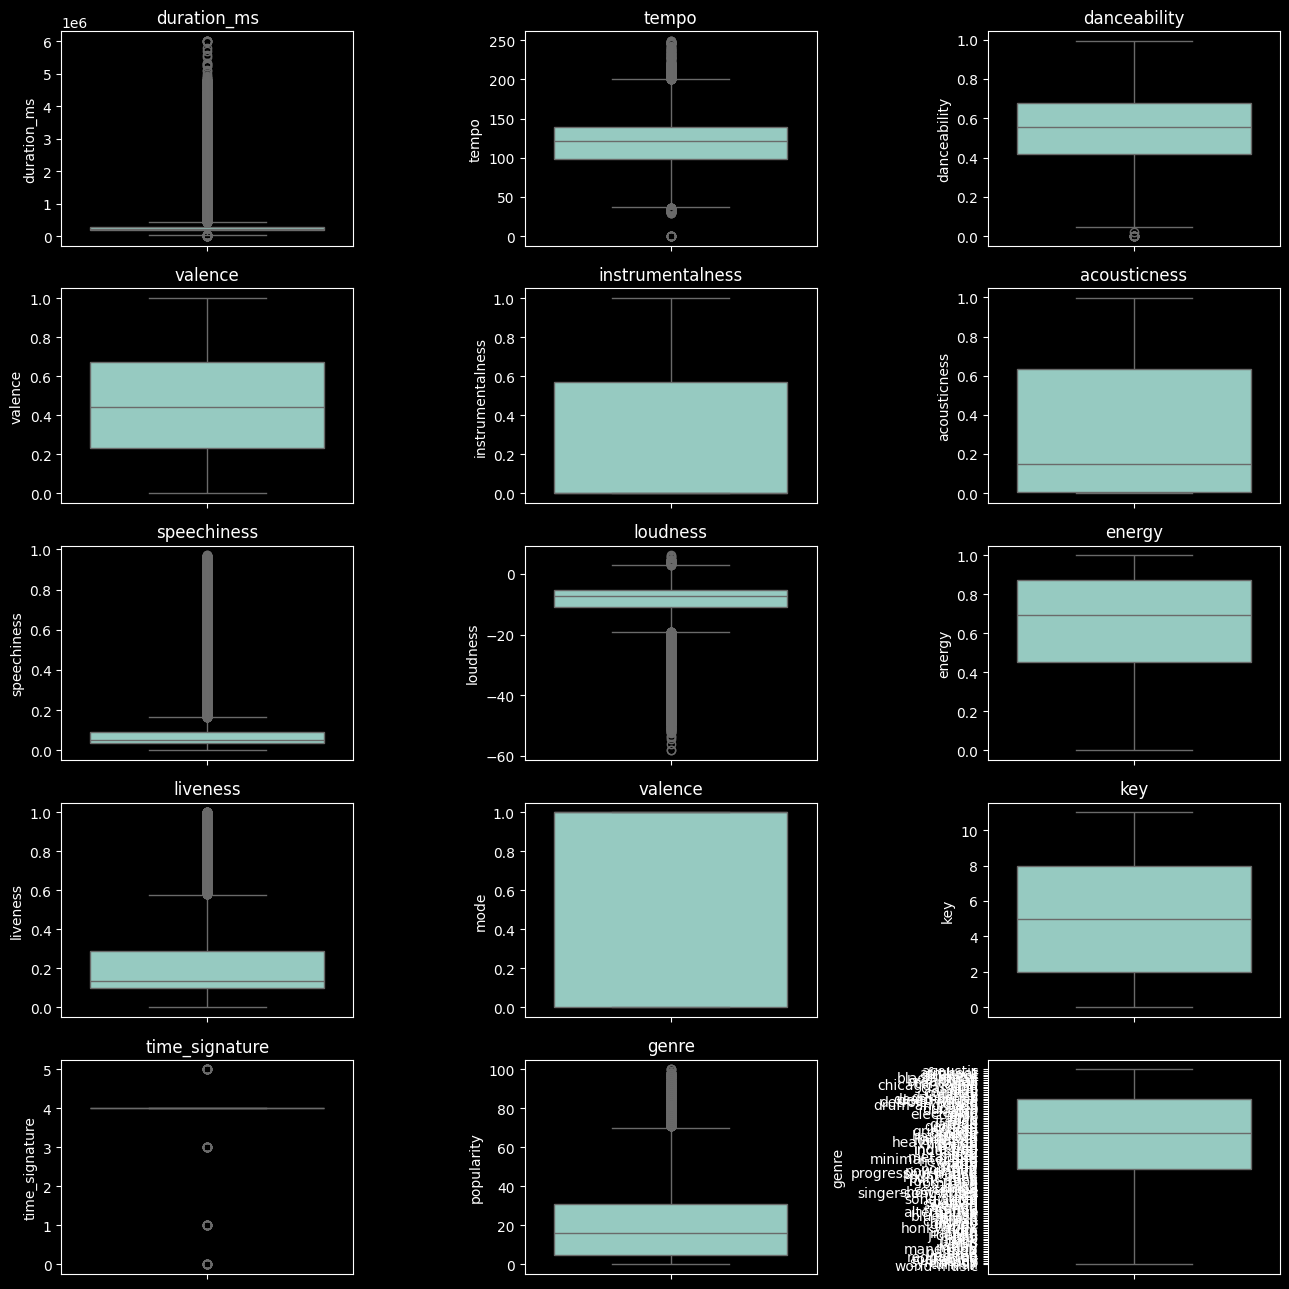

In [25]:
#Crear una figura con múltiples gráficos
fig,axes=plt.subplots(5,3,figsize=(13,13))
#Trazar el diagrama de caja
sns.boxplot(y=union_dataset['duration_ms'],ax=axes[0,0])
sns.boxplot(y=union_dataset['tempo'],ax=axes[0,1])
sns.boxplot(y=union_dataset['danceability'],ax=axes[0,2])
sns.boxplot(y=union_dataset['valence'],ax=axes[1,0])
sns.boxplot(y=union_dataset['instrumentalness'],ax=axes[1,1])
sns.boxplot(y=union_dataset['acousticness'],ax=axes[1,2])
sns.boxplot(y=union_dataset['speechiness'],ax=axes[2,0])
sns.boxplot(y=union_dataset['loudness'],ax=axes[2,1])
sns.boxplot(y=union_dataset['energy'],ax=axes[2,2])
sns.boxplot(y=union_dataset['liveness'],ax=axes[3,0])
sns.boxplot(y=union_dataset['mode'],ax=axes[3,1])
sns.boxplot(y=union_dataset['key'],ax=axes[3,2])
sns.boxplot(y=union_dataset['time_signature'],ax=axes[4,0])
sns.boxplot(y=union_dataset['popularity'],ax=axes[4,1])
sns.boxplot(y=union_dataset['genre'],ax=axes[4,2])
#Añadir títulos a cada gráfico
axes[0,0].set_title("duration_ms")
axes[0,1].set_title("tempo")
axes[0,2].set_title("danceability")
axes[1,0].set_title("valence")
axes[1,1].set_title("instrumentalness")
axes[1,2].set_title("acousticness")
axes[2,0].set_title("speechiness")
axes[2,1].set_title("loudness")
axes[2,2].set_title("energy")
axes[3,0].set_title("liveness")
axes[3,1].set_title("valence")
axes[3,2].set_title("key")
axes[4,0].set_title("time_signature")
axes[4,1].set_title("popularity")
axes[4,1].set_title("genre")
#Ajustar el espaciado entre gráficos
plt.tight_layout()
#Mostrar gráficos
plt.show()

Una vez localizadas las observaciones potencialmente atípicas, procedo a modificar mi conjunto de datos original siguiendo el proceso indicado: creo una copia del dataframe original, usando `copy`, # despues verifico las distribuciones de las variables involucradas con otro gráfico de cajas y un histograma para comprobar la distribución de las variables.




In [26]:
#Genwerar copia del dataset
dataset_modificated=union_dataset.copy(deep=True)
print(dataset_modificated.columns)
print(dataset_modificated.shape)
dataset_modificated.head(n=2)

Index(['artist_name', 'track_name', 'popularity', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'is_explicit'],
      dtype='object')
(1272789, 18)


,artist_name,track_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_explicit
0,Jason Mraz,I Won't Give Up,68,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133,240166,3,0
1,Jason Mraz,93 Million Miles,50,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140,216387,4,0


In [27]:
# prompt: elimina los valores atípicos del data
# Elimina los valores atípicos de la columna 'duration_ms'
dataset_modificated = dataset_modificated[dataset_modificated['duration_ms'] < 1000000]
# Elimina los valores atípicos de la columna 'tempo'
dataset_modificated = dataset_modificated[dataset_modificated['tempo'] < 200]
# Elimina los valores atípicos de la columna 'danceability'
#dataset_modificated = dataset_modificated[dataset_modificated['danceability'] < 1]
# Elimina los valores atípicos de la columna 'danceability'
dataset_modificated = dataset_modificated[dataset_modificated['danceability'] > 0.1]
# Elimina los valores atípicos de la columna 'valence'
dataset_modificated = dataset_modificated[dataset_modificated['valence'] < 1]
# Elimina los valores atípicos de la columna 'instrumentalness'
dataset_modificated = dataset_modificated[dataset_modificated['instrumentalness'] < 1]
# Elimina los valores atípicos de la columna 'acousticness'
dataset_modificated = dataset_modificated[dataset_modificated['acousticness'] < 1]
# Elimina los valores atípicos de la columna 'speechiness'
dataset_modificated = dataset_modificated[dataset_modificated['speechiness'] < 1]
# Elimina los valores atípicos de la columna 'loudness'
#dataset_modificated = dataset_modificated[dataset_modificated['loudness'] < -20]
#dataset_modificated = dataset_modificated[dataset_modificated['loudness'] > 0]
# Elimina los valores atípicos de la columna 'energy'
#dataset_modificated = dataset_modificated[dataset_modificated['energy'] < 1]
# Elimina los valores atípicos de la columna 'liveness'
dataset_modificated = dataset_modificated[dataset_modificated['liveness'] < 0.6]
# Elimina los valores atípicos de la columna 'key'
#dataset_modificated = dataset_modificated[dataset_modificated['key'] < 12]
# Elimina los valores atípicos de la columna 'time_signature'
#dataset_modificated = dataset_modificated[dataset_modificated['time_signature'] < 12]
# Elimina los valores atípicos de la columna 'popularity'
#dataset_modificated = dataset_modificated[dataset_modificated['popularity'] < 100]
#mostrar datos actualizados
print(union_dataset.shape)
print(dataset_modificated.shape)
dataset_modificated.head(n=2)

(1272789, 18)
(1158292, 18)


,artist_name,track_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_explicit
0,Jason Mraz,I Won't Give Up,68,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133,240166,3,0
1,Jason Mraz,93 Million Miles,50,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140,216387,4,0


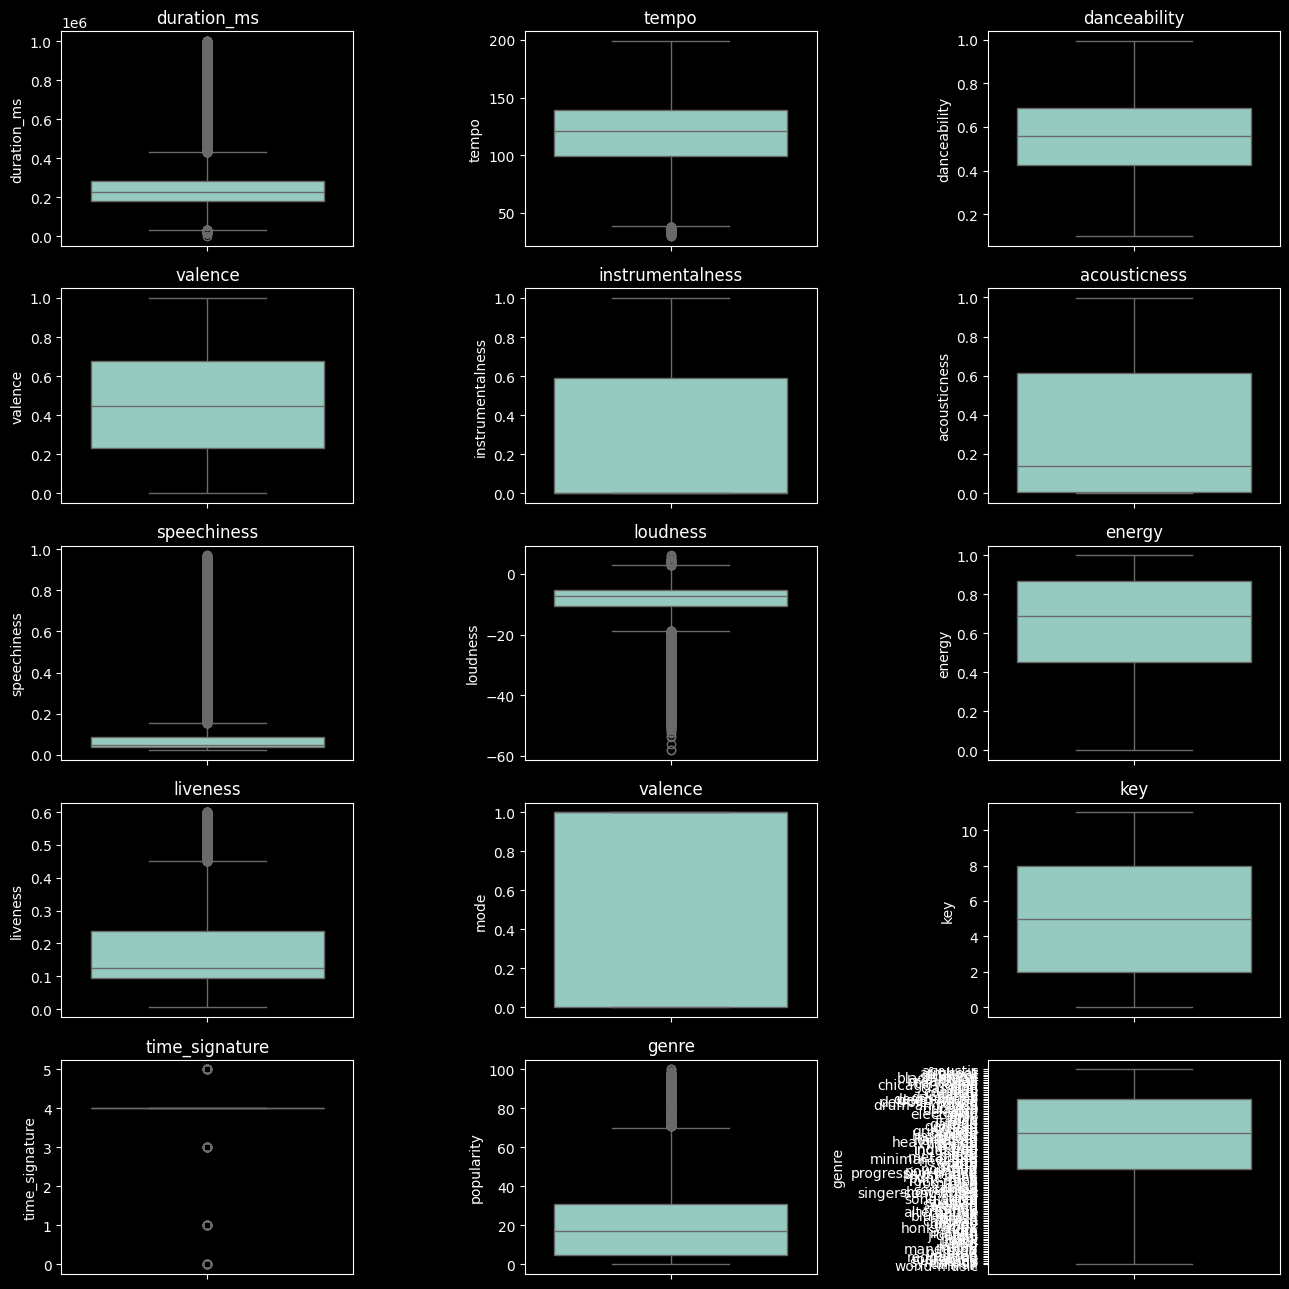

In [28]:
#Crear una figura con múltiples gráficos
fig,axes=plt.subplots(5,3,figsize=(13,13))
#Trazar el diagrama de caja
sns.boxplot(y=dataset_modificated['duration_ms'],ax=axes[0,0])
sns.boxplot(y=dataset_modificated['tempo'],ax=axes[0,1])
sns.boxplot(y=dataset_modificated['danceability'],ax=axes[0,2])
sns.boxplot(y=dataset_modificated['valence'],ax=axes[1,0])
sns.boxplot(y=dataset_modificated['instrumentalness'],ax=axes[1,1])
sns.boxplot(y=dataset_modificated['acousticness'],ax=axes[1,2])
sns.boxplot(y=dataset_modificated['speechiness'],ax=axes[2,0])
sns.boxplot(y=dataset_modificated['loudness'],ax=axes[2,1])
sns.boxplot(y=dataset_modificated['energy'],ax=axes[2,2])
sns.boxplot(y=dataset_modificated['liveness'],ax=axes[3,0])
sns.boxplot(y=dataset_modificated['mode'],ax=axes[3,1])
sns.boxplot(y=dataset_modificated['key'],ax=axes[3,2])
sns.boxplot(y=dataset_modificated['time_signature'],ax=axes[4,0])
sns.boxplot(y=dataset_modificated['popularity'],ax=axes[4,1])
sns.boxplot(y=dataset_modificated['genre'],ax=axes[4,2])
#Añadir títulos a cada gráfico
axes[0,0].set_title("duration_ms")
axes[0,1].set_title("tempo")
axes[0,2].set_title("danceability")
axes[1,0].set_title("valence")
axes[1,1].set_title("instrumentalness")
axes[1,2].set_title("acousticness")
axes[2,0].set_title("speechiness")
axes[2,1].set_title("loudness")
axes[2,2].set_title("energy")
axes[3,0].set_title("liveness")
axes[3,1].set_title("valence")
axes[3,2].set_title("key")
axes[4,0].set_title("time_signature")
axes[4,1].set_title("popularity")
axes[4,1].set_title("genre")
#Ajustar el espaciado entre gráficos
plt.tight_layout()
#Mostrar gráficos
plt.show()

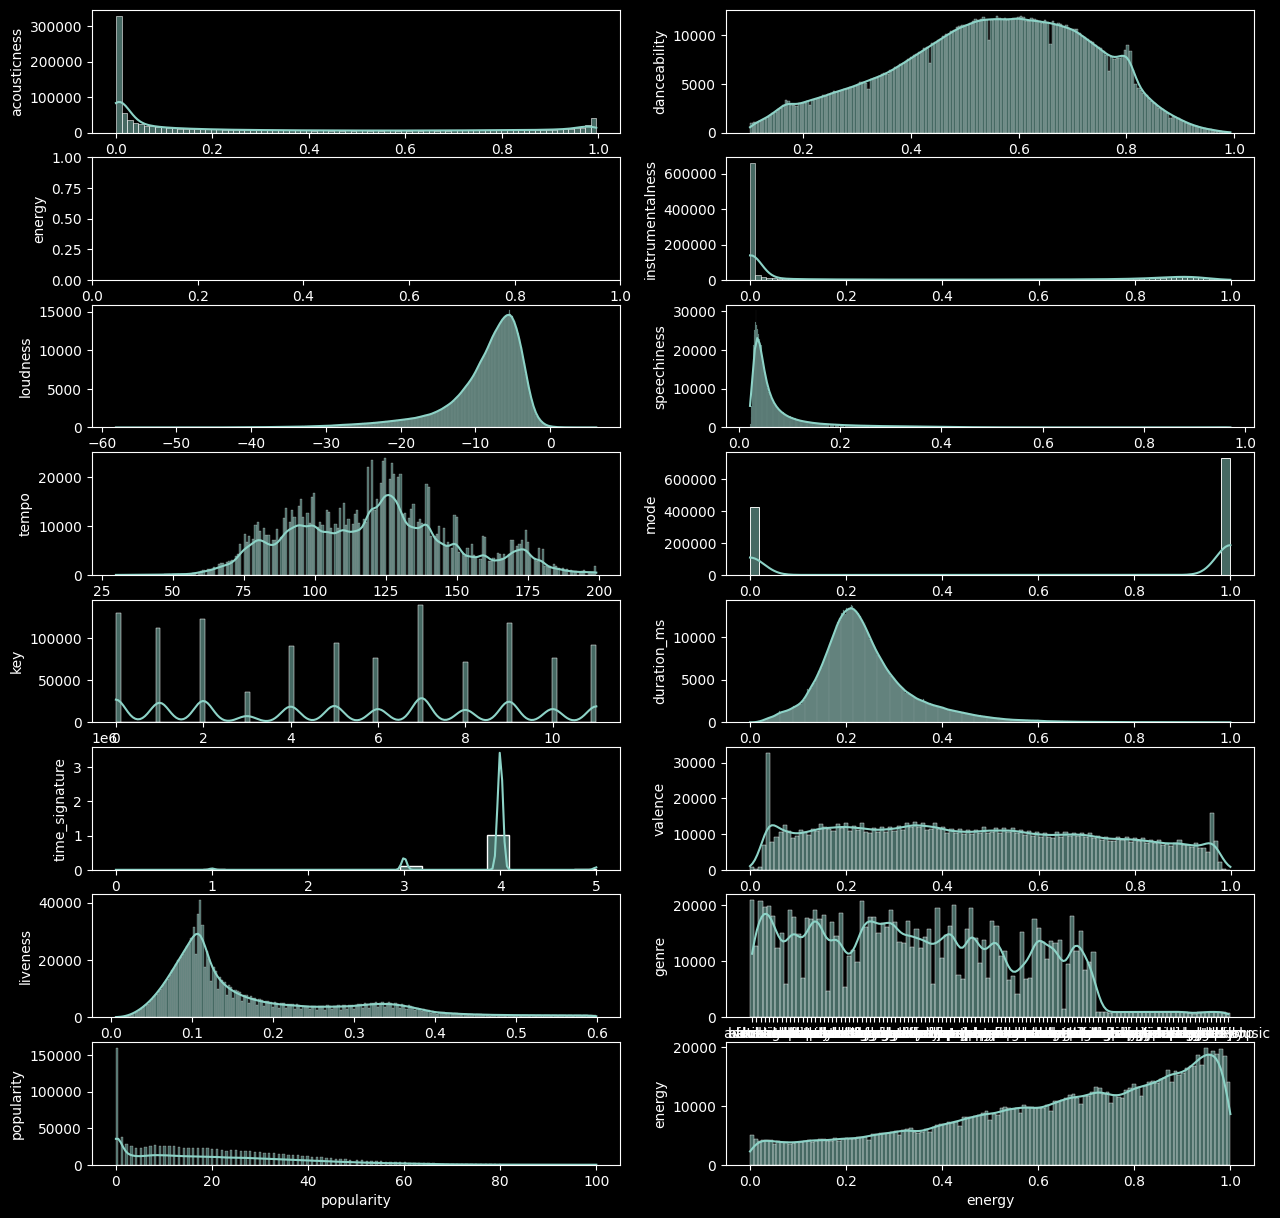

In [29]:
#Crear una figura con múltiples gráficos
fig,axes=plt.subplots(8,2,figsize=(15,15))
#Graficar la distribución de cada variable
sns.histplot(data=dataset_modificated,x="acousticness",kde=True,ax=axes[0,0])
sns.histplot(data=dataset_modificated,x="danceability",kde=True,ax=axes[0,1])
sns.histplot(data=dataset_modificated,x="instrumentalness",kde=True,ax=axes[1,1])
sns.histplot(data=dataset_modificated,x="loudness",kde=True,ax=axes[2,0])
sns.histplot(data=dataset_modificated,x="speechiness",kde=True, ax=axes[2,1])
sns.histplot(data=dataset_modificated,x="tempo",kde=True,ax=axes[3,0])
sns.histplot(data=dataset_modificated,x="mode",kde=True,ax=axes[3,1])
sns.histplot(data=dataset_modificated,x="key",kde=True,ax=axes[4,0])
sns.histplot(data=dataset_modificated,x="duration_ms",kde=True,ax=axes[4,1])
sns.histplot(data=dataset_modificated,x="time_signature",kde=True,ax=axes[5,0])
sns.histplot(data=dataset_modificated,x="valence",kde=True,ax=axes[5,1])
sns.histplot(data=dataset_modificated,x="liveness",kde=True,ax=axes[6,0])
sns.histplot(data=dataset_modificated,x="genre",kde=True,ax=axes[6,1])
sns.histplot(data=dataset_modificated,x="popularity",kde=True,ax=axes[7,0])
sns.histplot(data=dataset_modificated,x="energy",kde=True,ax=axes[7,1])
#Añadir títulos a cada gráfico
axes[0,0].set_ylabel("acousticness")
axes[0,1].set_ylabel("danceability")
axes[1,0].set_ylabel("energy")
axes[1,1].set_ylabel("instrumentalness")
axes[2,0].set_ylabel("loudness")
axes[2,1].set_ylabel("speechiness")
axes[3,0].set_ylabel("tempo")
axes[3,1].set_ylabel("mode")
axes[4,0].set_ylabel("key")
axes[4,1].set_ylabel("duration_ms")
axes[5,0].set_ylabel("time_signature")
axes[5,1].set_ylabel("valence")
axes[6,0].set_ylabel("liveness")
axes[6,1].set_ylabel("genre")
axes[7,0].set_ylabel("popularity")
axes[7,1].set_ylabel("energy")
#Mostrar el gráfico
plt.show()

Tras realizar este proceso, me encuentro en condiciones de trabajar con un conjunto de datos libre de observaciones atípicas evidentes. De esta manera, puedo garantizar que las conclusiones extraídas y los modelos construidos no estarán sesgados debido a la presencia de extremos poco probables o errores de medición. Esta práctica constituye una etapa fundamental en el flujo de trabajo de campos como la ciencias de datos y el machine learning, pues ayuda a preservar la fiabilidad y robustez de los hallazgos posteriores.




##Comprobar relación entre variables

En el paso subsiguiente, retomando el análisis de los datos, centré mi interés en examinar minuciosamente las relaciones entre las diversas variables disponibles, dando prioridad a aquellas con mayores coeficientes de correlación. Este proceso puede ser descrito como sigue:

Recalcular la matriz de correlaciones entre las variables numéricas del conjunto de datos preprocesado.

```
correlation_matrix = union_dataset.corr(numeric_only=True)
```

Seleccionar una variable particular que tenga altas niveles de correlación con otras variables ('variable_elegida') con el objetivo de investigar sus relaciones con otras variables del dataframe.

Generar una vista filtrada de la matriz de correlaciones correspondiente a la variable seleccionada, ordenada decrecientemente.
```
correlacion_ordenada = correlation_matrix[var_de_interes].sort_values(ascending=False)```

Mostrar en pantalla los coeficientes de correlación entre la variable elegida y las demás variables.


In [30]:
# Calcular el coeficiente de correlación de Pearson para cada par de variables
#nota: es necesario poner el parámetro numeric_only de corr en True para evitar un FutureWarning
correlation_matrix_mod=dataset_modificated.corr(numeric_only=True)
correlation_matrix_mod

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_explicit
popularity,1.000000,0.094761,0.008429,-0.000689,0.102212,-0.021762,0.007085,-0.048262,-0.166894,-0.028636,-0.021148,0.000464,-0.137338,0.031476,0.087549
danceability,0.094761,1.000000,0.138162,0.030861,0.241234,-0.055048,0.113161,-0.180312,-0.156798,-0.100902,0.504626,-0.034046,0.014639,0.170248,0.045944
energy,0.008429,0.138162,1.000000,0.039341,0.790655,-0.056419,0.142597,-0.770126,-0.179674,0.207814,0.254588,0.269770,0.059319,0.174541,0.026214
key,-0.000689,0.030861,0.039341,1.000000,0.026935,-0.165350,0.021657,-0.035044,0.000238,-0.004205,0.026273,0.008813,0.016288,0.010603,0.001854
loudness,0.102212,0.241234,0.790655,0.026935,1.000000,-0.022036,0.087250,-0.625985,-0.411271,0.156740,0.286473,0.221749,-0.011329,0.163124,0.040047
mode,-0.021762,-0.055048,-0.056419,-0.165350,-0.022036,1.000000,-0.040138,0.069448,-0.055588,0.008739,0.017181,-0.005933,-0.061728,-0.018688,-0.010650
speechiness,0.007085,0.113161,0.142597,0.021657,0.087250,-0.040138,1.000000,-0.085230,-0.120681,0.138287,0.051414,0.025453,-0.090001,0.015715,0.068144
acousticness,-0.048262,-0.180312,-0.770126,-0.035044,-0.625985,0.069448,-0.085230,1.000000,0.105744,-0.113965,-0.108773,-0.236029,-0.132392,-0.173236,-0.032324
instrumentalness,-0.166894,-0.156798,-0.179674,0.000238,-0.411271,-0.055588,-0.120681,0.105744,1.000000,-0.111047,-0.308180,-0.027622,0.204251,-0.055845,-0.047013
liveness,-0.028636,-0.100902,0.207814,-0.004205,0.156740,0.008739,0.138287,-0.113965,-0.111047,1.000000,0.030424,0.040163,-0.080840,0.009522,0.006205


In [31]:
#Imprimir la matriz de correlación para la variable
print(correlation_matrix_mod["energy"].sort_values(ascending=True))

acousticness       -0.770126
instrumentalness   -0.179674
mode               -0.056419
popularity          0.008429
is_explicit         0.026214
key                 0.039341
duration_ms         0.059319
danceability        0.138162
speechiness         0.142597
time_signature      0.174541
liveness            0.207814
valence             0.254588
tempo               0.269770
loudness            0.790655
energy              1.000000
Name: energy, dtype: float64


Con base en los coeficientes de correlación anteriormente calculados, estudie el comportamiento de las demas variables respecto a la variable seleccionada. Empleando herramientas gráficas, profundicé en el conocimiento de dichas relaciones graficando la dispersión de las variables seleccionadas frente a la variable de interés, con objeto de contrastar visualmente los patrones de correlación.


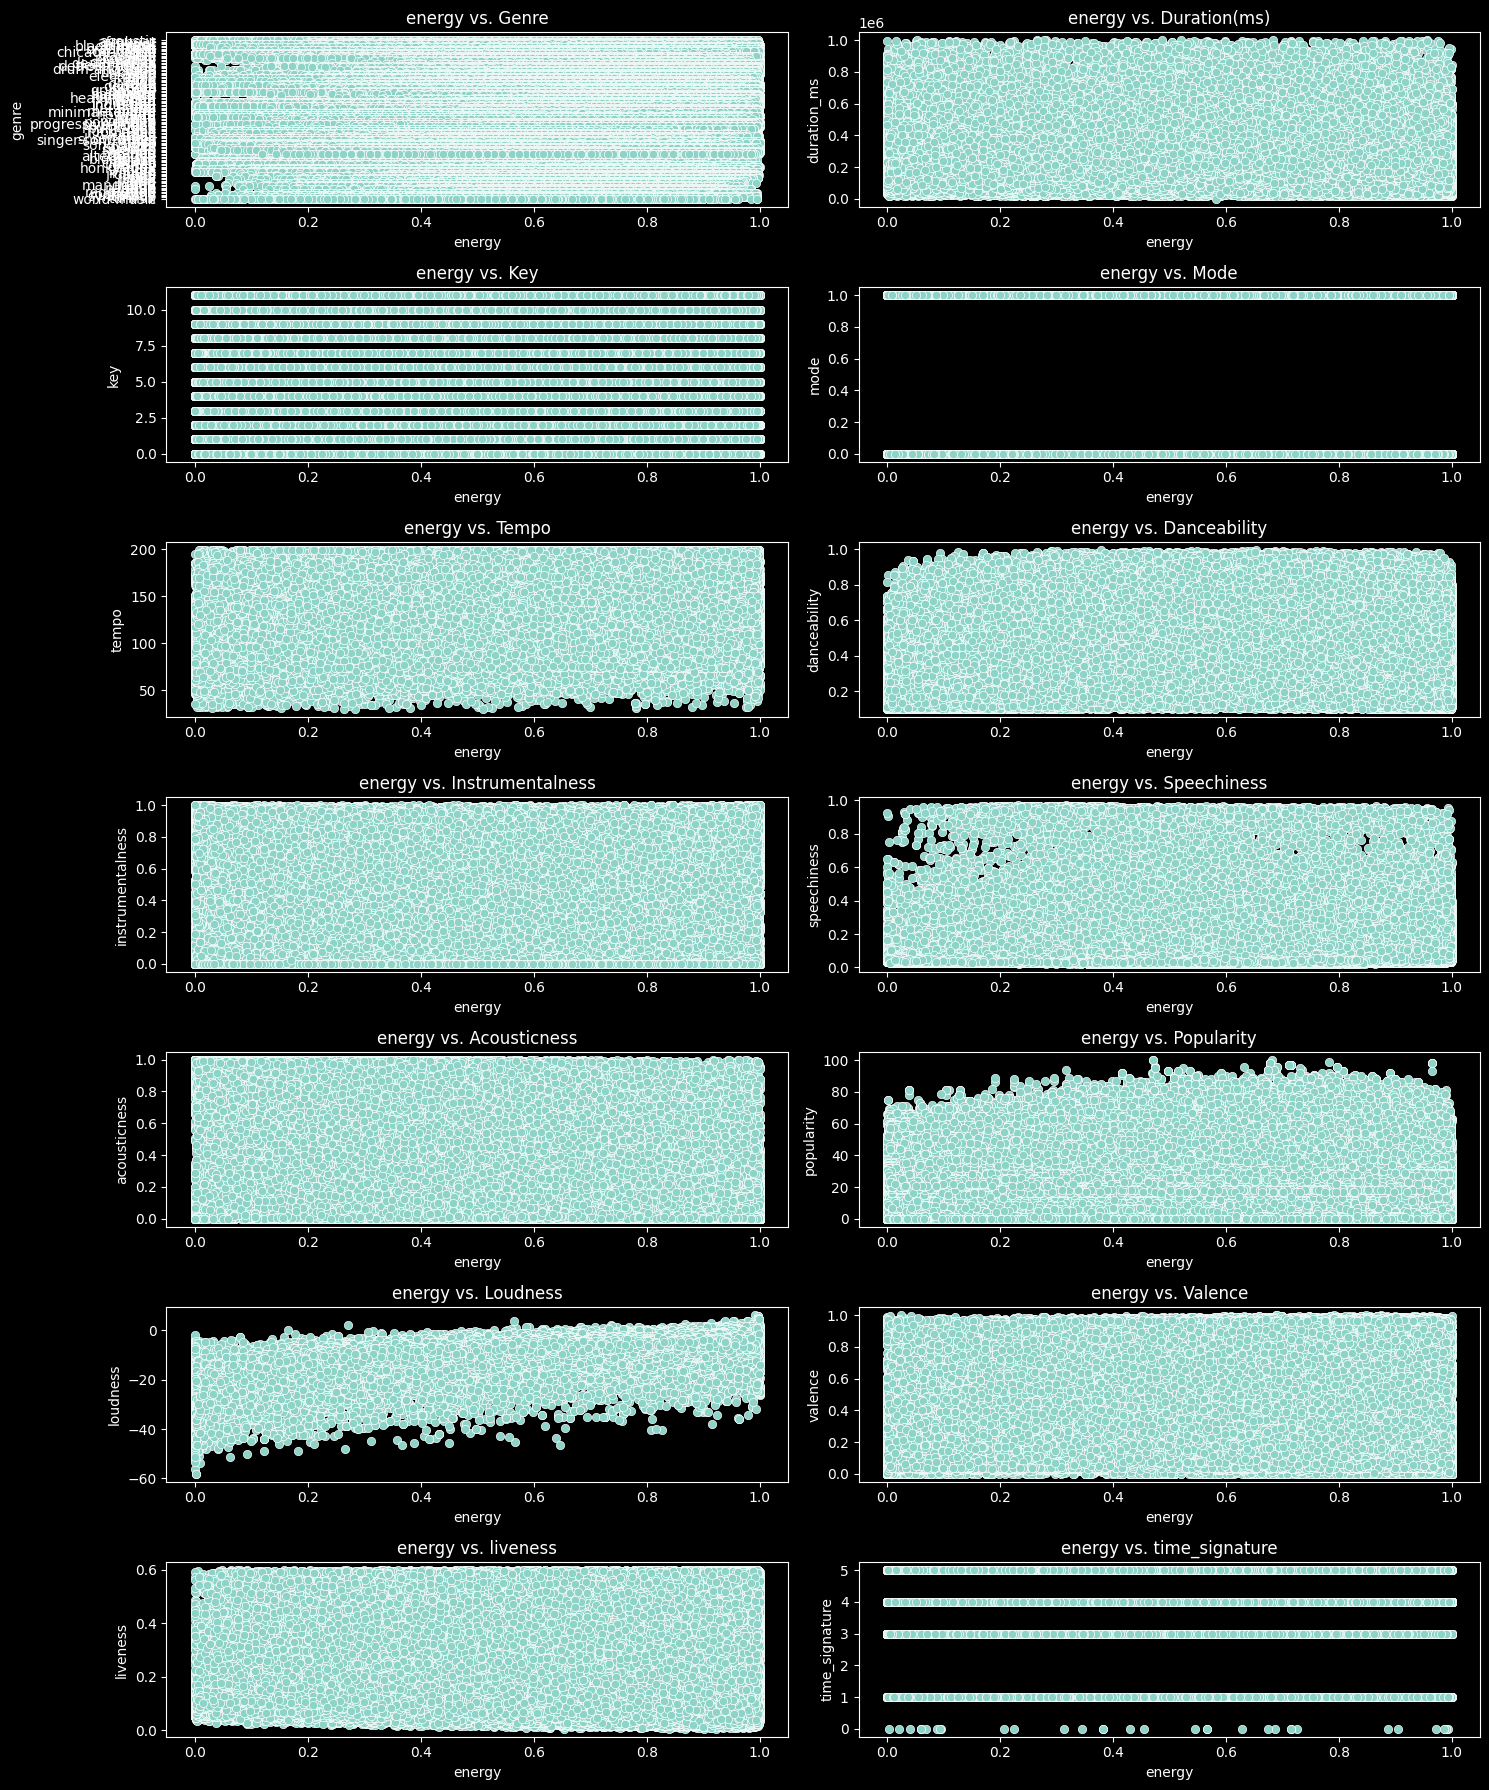

In [32]:
#Crear una figura con múltiples gráficos
fig,axes=plt.subplots(7,2,figsize=(15,18))
#Realizar los diagramas de dispersión
sns.scatterplot(x="energy",y="genre",data=dataset_modificated,ax=axes[0,0])
sns.scatterplot(x="energy",y="duration_ms",data=dataset_modificated,ax=axes[0,1])
sns.scatterplot(x="energy",y="key",data=dataset_modificated,ax=axes[1,0])
sns.scatterplot(x="energy",y="mode",data=dataset_modificated,ax=axes[1,1])
sns.scatterplot(x="energy",y="tempo",data=dataset_modificated,ax=axes[2,0])
sns.scatterplot(x="energy",y="danceability",data=dataset_modificated,ax=axes[2,1])
sns.scatterplot(x="energy",y="instrumentalness",data=dataset_modificated,ax=axes[3,0])
sns.scatterplot(x="energy",y="speechiness",data=dataset_modificated,ax=axes[3,1])
sns.scatterplot(x="energy",y="acousticness",data=dataset_modificated,ax=axes[4,0])
sns.scatterplot(x="energy",y="popularity", data=dataset_modificated,ax=axes[4,1])
sns.scatterplot(x="energy",y="loudness",data=dataset_modificated,ax=axes[5,0])
sns.scatterplot(x="energy",y="valence",data=dataset_modificated,ax=axes[5,1])
sns.scatterplot(x="energy",y="liveness",data=dataset_modificated,ax=axes[6,0])
sns.scatterplot(x="energy",y="time_signature",data=dataset_modificated,ax=axes[6,1])
#Añadir títulos a cada gráfico
axes[0,0].set_title("energy vs. Genre")
axes[0,1].set_title("energy vs. Duration(ms)")
axes[1,0].set_title("energy vs. Key")
axes[1,1].set_title("energy vs. Mode")
axes[2,0].set_title("energy vs. Tempo")
axes[2,1].set_title("energy vs. Danceability")
axes[3,0].set_title("energy vs. Instrumentalness")
axes[3,1].set_title("energy vs. Speechiness")
axes[4,0].set_title("energy vs. Acousticness")
axes[4,1].set_title("energy vs. Popularity")
axes[5,0].set_title("energy vs. Loudness")
axes[5,1].set_title("energy vs. Valence")
axes[6,0].set_title("energy vs. liveness")
axes[6,1].set_title("energy vs. time_signature")
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

##codificación de la variable categórica genre

Se procedió a encoder la variable categórica "genre" del conjunto de datos, transformándola de strings a números mediante la función LabelEncoder() de scikit-learn. Este paso es crucial, ya que los algoritmos de aprendizaje automático trabajan con datos numéricos y no con cadenas de texto (string). Al convertir la variable "genre" a datos numéricos, facilita su procesamiento y mejora la precisión de los modelos entrenados, seguido a esto, se volvio a revisar la relacion de la varaible elegida con las otras variables para revisar que relación tenia con la variable categórica codificada.

In [33]:
#conteo de la cantidad de veces que se repite cada categoría de genre
categories_count=dataset_modificated['genre'].value_counts()
#generar un diccionario con genres_count_1 siendo clave el genero y valor el conteo
categories_count_dict=dict(categories_count)
categories_count_dict

{'acoustic': 20914,
 'emo': 20862,
 'alt-rock': 20729,
 'k-pop': 20088,
 'black-metal': 19870,
 'ambient': 19684,
 'indian': 19506,
 'new-age': 19449,
 'chill': 19252,
 'gospel': 19237,
 'dancehall': 19197,
 'dub': 18616,
 'deep-house': 18300,
 'spanish': 18156,
 'blues': 18071,
 'french': 17986,
 'classical': 17893,
 'forro': 17888,
 'country': 17735,
 'death-metal': 17593,
 'salsa': 17546,
 'dance': 17484,
 'guitar': 17226,
 'pop-film': 17186,
 'goth': 16970,
 'disco': 16967,
 'garage': 16920,
 'jazz': 16334,
 'power-pop': 16332,
 'folk': 16214,
 'german': 16086,
 'samba': 15905,
 'hip-hop': 15853,
 'hardcore': 15815,
 'minimal-techno': 15730,
 'tango': 15333,
 'rock-n-roll': 15266,
 'cantopop': 14985,
 'funk': 14983,
 'club': 14865,
 'industrial': 14732,
 'drum-and-bass': 14505,
 'heavy-metal': 14400,
 'opera': 14122,
 'sleep': 13829,
 'piano': 13762,
 'singer-songwriter': 13611,
 'grindcore': 13487,
 'sertanejo': 13386,
 'groove': 13308,
 'ska': 13263,
 'afrobeat': 12669,
 'hard-ro

In [38]:
#codificar la variable categorica genre del dataset con label encoding
le=LabelEncoder()
dataset_modificated['genre']=le.fit_transform(dataset_modificated['genre'])
dataset_modificated.head(n=2)

,artist_name,track_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_explicit
0,Jason Mraz,I Won't Give Up,68,0,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133,240166,3,0
1,Jason Mraz,93 Million Miles,50,0,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140,216387,4,0


In [39]:
#mostrar la matriz de correlaciones con los datos numéricos del género incluidos
correlation_data_mod=dataset_modificated.corr(numeric_only=True)
correlation_data_mod['energy'].sort_values(ascending=True)

acousticness       -0.770126
instrumentalness   -0.179674
genre              -0.082973
mode               -0.056419
popularity          0.008429
is_explicit         0.026214
key                 0.039341
duration_ms         0.059319
danceability        0.138162
speechiness         0.142597
time_signature      0.174541
liveness            0.207814
valence             0.254588
tempo               0.269770
loudness            0.790655
energy              1.000000
Name: energy, dtype: float64

##Exportar copia del dataset pre-procesado

La versión preprocesada del conjunto de datos se exportó y guardó una copia como archivo CSV mediante la función to_csv(). Esto permite disponer de una copia de respaldo del dataset tratado, la cual resulta útil durante el desarrollo del modelo.

In [40]:
dataset_modificated.to_csv('/content/drive/MyDrive/Colab Notebooks/kookaon/pre_processed_data/energy_dataset.csv')

# Contrucción de los modelos beta



## importar dataset previamente pre-procesado


In [41]:
#importar dataset pre-procesado
energy_dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kookaon/pre_processed_data/energy_dataset.csv')
print(energy_dataset.shape)
print(energy_dataset.columns)
energy_dataset.head(n=2)

(1158292, 19)
Index(['Unnamed: 0', 'artist_name', 'track_name', 'popularity', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'is_explicit'],
      dtype='object')


,Unnamed: 0,artist_name,track_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_explicit
0,0,Jason Mraz,I Won't Give Up,68,0,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133,240166,3,0
1,1,Jason Mraz,93 Million Miles,50,0,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140,216387,4,0


## variables para crear modelos

Comenzando a construir el modelo, fue necesaria la selección de variables; por lo que se creó una lista denominada "features" que incluye las variables a utilizar: '*danceability*','*instrumentalness*','*acousticness*','*loudness*','*valence*','*tempo*','*speechiness*','*time_signature*','*liveness*'. cuando fue necesario, se cambiaros la lista de variables para realizar pruebas, simplemente se tenía que anidar esta lista en otra línea, asimismo se probo los resultados al inferir variables como popularity o valence, no obstante estas variables presentaban un bajo nivel de correlación con las demas variables (dato que se hace evidente al revisar la matriz de correlación), inferir estas variables ocasiono casos de subajuste.

Se crearon las variables para el modelo definiendo *X* como las columnas seleccionadas del dataset para predecir popularity, y la variable "*y*" como popularity, o sea, la variable a predecir. Posteriormente, el dataset se dividió en datos de entrenamiento y datos de prueba usando train_test_split. Para concluir, se visualizaron las primeras filas de X con head().

Cabe señalar que, antes de continuar con el proceso, es esencial verificar que las variables incluidas en features sean las adecuadas para el problema planteado y que los datos en '*X*' e '*y*' estén en el formato correcto para ser ingresados al modelo de aprendizaje automático, por lo que se hizo multiples pruebas con varios grupos de variables segun el análisis de los datos, llegando a entender el importante papel que juegan las correlaciones entre las variables en el diseño de un modelo con buena presición.

In [ ]:
# Calcular el coeficiente de correlación de Pearson para cada par de variables relacionadas con energy
#nota: es necesario poner el parámetro numeric_only de corr en True para evitar un FutureWarning
correlation_matrix=energy_dataset.corr(numeric_only=True)
#Imprimir la matriz de correlación ordenada para la variable a predecir
print(correlation_matrix["energy"].sort_values(ascending=True))

acousticness       -0.770126
instrumentalness   -0.179674
mode               -0.056419
Unnamed: 0         -0.008554
popularity          0.008429
is_explicit         0.026214
key                 0.039341
duration_ms         0.059319
danceability        0.138162
speechiness         0.142597
time_signature      0.174541
liveness            0.207814
valence             0.254588
tempo               0.269770
loudness            0.790655
energy              1.000000
Name: energy, dtype: float64


In [ ]:
#establecer las variables para usar en el modelo
features=['danceability','instrumentalness','acousticness','loudness','valence','tempo','speechiness','time_signature','liveness']#'key','mode','duration_ms',
X,y=energy_dataset[features],energy_dataset.energy
train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=48,test_size=0.20)
X.head(n=3)

,danceability,instrumentalness,acousticness,loudness,valence,tempo,speechiness,time_signature,liveness
0,0.483,0.000000,0.694,-10.058,0.139,133,0.0429,3,0.1150
1,0.572,0.000014,0.477,-10.286,0.515,140,0.0258,4,0.0974
2,0.409,0.000050,0.338,-13.711,0.145,139,0.0323,4,0.0895


##modelos construidos

Se construyeron diferentes modelos de RandomForestRegressor, llamados actualmente sonorikuk0, sonorikuk1 y sonorikuk2, todos con el parámetro aleatorio random_state establecido en 48 para garantizar la reproducción de los resultados de las pruebas. Todos los modelos tienen definidos los hiperparámetros n_estimators, min_samples_leaf y max_depth, siendo diferentes los valores asignados a cada uno de ellos para cada modelo, posteriormente se evaluo un modelo alternativo usando regresión lineal para comparar la precisión de los modelos de random forest con otro tipo de modelo.

 Mediante la comparación de estos tres modelos, se evalúan diversas configuraciones de hiperparámetros, adaptándolas gradualmente para encontrar el modelo con mejor ajuste y minimizar el riesgo de overfitting o underfitting. Entonces, se entrena cada modelo usando los datos de entrenamiento y pruebas.

In [ ]:
#definir y entrenar el modelo 0 de random forest
beta_model_00=RandomForestRegressor(n_estimators=92-30,min_samples_leaf=35-25,max_depth=32-25,criterion='friedman_mse',random_state=48)
beta_model_00.fit(train_X,train_y)

RandomForestRegressor(criterion='friedman_mse', max_depth=7,
                      min_samples_leaf=10, n_estimators=62, random_state=48)

In [ ]:
#definir y entrenar modelo 1 de regresión lineal
beta_model_01=LinearRegression()
beta_model_01.fit(train_X, train_y)

LinearRegression()

In [ ]:
#definir y entrenar otro modelo e de random forest con hiperparámetros diferentes al modelo 1
beta_model_02=RandomForestRegressor(n_estimators=54-20,min_samples_leaf=25+20,max_depth=237-20,criterion='friedman_mse',random_state=48)
beta_model_02.fit(train_X,train_y)

RandomForestRegressor(criterion='friedman_mse', max_depth=217,
                      min_samples_leaf=45, n_estimators=34, random_state=48)

# validación de los modelos

##Realizar predicción

En esta sección, se ejecutan las predicciones de los modelos mediante la función predict() y se imprimen los primeros números de los resultados de la predicción. Esto permite visualizar y evaluar la calidad de las predicciones generadas por los modelos entrenados, facilitando la identificación de cualquier patrón o inconsistencia en los valores pronosticados.

In [ ]:
#modelo de regresión 0
prediccion_00=beta_model_00.predict(val_X)
print('predicción modelo 1',prediccion_00[:14])
#modelo de regresión 1
prediccion_01=beta_model_01.predict(val_X)
print('predicción modelo 2=',prediccion_01[:14])
#modelo de regresión 2
prediccion_02=beta_model_02.predict(val_X)
print('predicción modelo 3=',prediccion_02[:14])

predicción modelo 1 [0.39392774 0.76746316 0.86915177 0.52000812 0.90928853 0.78601669
 0.27612468 0.87719826 0.76832704 0.40389483 0.52554177 0.74957022
 0.56584307 0.53037636]
predicción modelo 2= [0.53549175 0.776071   0.85304841 0.6148662  0.82852096 0.80093225
 0.39679144 0.82859885 0.79089772 0.41720297 0.477776   0.68151017
 0.67062838 0.64797927]
predicción modelo 3= [0.4360251  0.82472823 0.87765228 0.52018424 0.90559534 0.79151565
 0.31117636 0.88453664 0.78193625 0.36235784 0.48543721 0.69519306
 0.58394851 0.56455616]


En esta sección, cargo un tercer conjunto de datos no relacionado con el utilizado en el preprocesamiento y la validación del modelo, aunque posee variables casi idénticas. Extraigo un par de filas con iloc y visualizo el nombre de la canción, el artista y su género. Incluso si los nombres de género que aparecen en género y subgénero difieren de los usados en el conjunto de datos del modelo, visualizo el género para determinar a qué género del conjunto de datos podría corresponder.

Creo un diccionario donde la clave es la variable utilizada para predecir, y el valor es un dato tomado desde el nuevo conjunto de datos alternativo. En género, asigno el género equivalente más similar. Convierto ese diccionario en un DataFrame de pandas, paso ese DataFrame a la función predict() de los modelos y enumero el nombre del artista y la canción, ya que este nuevo conjunto de datos alternativo también tiene una variable de popularidad. Imprimo la popularidad provista en ese conjunto de datos alternativo, así como la popularidad predicha por los modelos, para evaluar la calidad de las predicciones con un conjunto de datos alternativo. Esta prueba sirve como un medio complementario adicional que también me permite tener casos de predicción con datos diferentes a los datos de entrenamiento.

##Comparación por métricas

Siguiendo con el proceso metodológico inherente al desarrollo de modelos predictivos, se ejecuto el cálculo de diversas métricas de rendimiento para evaluar y comparar la precisión de tres alternativas de algoritmos. Concretamente, se estimo los siguientes indicadores: error cuadrático medio (MSE), error absoluto medio (MAE), el coeficiente de determinación ($R^2$) y el error raíz medio cuadrático (RMSE). Se procedió a organizar los resultados en un DataFrame de Pandas y clasificarlos ascendentemente con arreglo al criterio del menor RMSE, con miras a determinar al modelo que exhibió la performance más satisfactoria.

Como resultado, se puede obtener una visión sistemática y comparable de las métricas de rendimiento de cada modelo, permitiéndonos discernir con claridad el modelo que minimiza el error cuadrático medio y, por ende, produce las predicciones más certeras. Tal y como se podría esperer, esta instancia correspondería a nuestra primera elección a la hora de adoptar un modelo predictivo confiable y válido. Presentar y argumentar los hallazgos bajo este riguroso formato refuerza la solidez y credibilidad de las afirmaciones y decisiones.

###Error cuadrático medio (MSE)

In [ ]:
#obtener error cuadratico medio para los modelos de machine learning random forest
#Calcular el error cuadrático medio del modelo 0
mse_00=mean_squared_error(val_y,prediccion_00)
#Calcular el error cuadrático medio del modelo 1
mse_01=mean_squared_error(val_y,prediccion_01)
#Calcular el error cuadrático medio del modelo 3
mse_02=mean_squared_error(val_y,prediccion_02)
#Mostrar los errores medios al cuadrado
print('Error cuadrático medio del modelo 0:', mse_00)
print('Error cuadrático medio del modelo 1:', mse_01)
print('Error cuadrático medio del modelo 2:', mse_02)


Error cuadrático medio del modelo 0: 0.012394869738628266
Error cuadrático medio del modelo 1: 0.015314704595761014
Error cuadrático medio del modelo 2: 0.00969097961309512


###Error absoluto medio (MAE)

In [ ]:
#obtener el error absoluto medio (MAE) para los modelos de machine learning random forest
#Calcular el error medio absoluto del modelo 0
mae_00=mean_absolute_error(val_y,prediccion_00)
#Calcular el error medio absoluto del modelo 1
mae_01=mean_absolute_error(val_y,prediccion_01)
#Calcular el error medio absoluto del modelol 2
mae_02=mean_absolute_error(val_y,prediccion_02)
#Mostrar los errores absolutos medios
print('Error absoluto medio del modelo 0:',mae_00)
print('Error absoluto medio del modelo 1:',mae_01)
print('Error absoluto medio del modelo 2:',mae_02)


Error absoluto medio del modelo 0: 0.08459183344368411
Error absoluto medio del modelo 1: 0.09714344646123195
Error absoluto medio del modelo 2: 0.07298353965271591


###Coeficiente de determinación ($R^2$)

In [ ]:
#obtener el el coeficiente de determinación ($R^2$) para los modelos de random forest
#Calcular el R^2 del modelo 0
r2_00=beta_model_00.score(val_X,val_y)
#Calcular el R^2 del modelol 1
r2_01=beta_model_01.score(val_X,val_y)
#Calcular el R^2 del modelo 2
r2_02=beta_model_02.score(val_X, val_y)
#Mostrar los valores R^2
print('R^2 para modelo 0:', r2_00)
print('R^2 para modelo 1:', r2_01)
print('R^2 para modelo 2:', r2_02)


R^2 para modelo 0: 0.8278645485003606
R^2 para modelo 1: 0.7873149419263948
R^2 para modelo 2: 0.865415193031424


###Error raíz medio cuadrático (RMSE)

In [ ]:
#obtener el error raíz medio cuadrático (RMSE) para los modelos de random forest
#Calcular el error cuadrático medio del modelo 0
rmse_00=np.sqrt(mse_00)
#Calcular el error cuadrático medio del modelo 1
rmse_01=np.sqrt(mse_01)
#Calcular el error cuadrático medio del modelo 2
rmse_02=np.sqrt(mse_02)
#Mostrar el error cuadrático medio
print('Root mean squared error for regression model:', rmse_00)
print('Root mean squared error for k regression model:', rmse_01)
print('Root mean squared error for k2 regression model:', rmse_02)


Root mean squared error for regression model: 0.11133224931989952
Root mean squared error for k regression model: 0.12375259429911364
Root mean squared error for k2 regression model: 0.09844277329034935


###comparar métricas

In [ ]:
#comparar las métricas previas y determinar que modelo es mejor
#Comparar las métricas de los modelos
#Crear un DataFrame con las métricas de cada modelo
metrics_df = pd.DataFrame({
    'Model': ['K0','K1','K2'],
    'MSE': [mse_00,mse_01,mse_02],
    'MAE': [mae_00,mae_01,mae_02],
    'R^2': [r2_00,r2_01,r2_02],
    'RMSE': [rmse_00,rmse_01,rmse_02]})
#Ordenar el DataFrame por la columna 'Rr2_00metrics_df = metrics_df.sort_values(by='RMSE')
#Imprimir el DataFrame
print(metrics_df)
#Determinar el mejor modelo
best_model = metrics_df['Model'].iloc[0]
#Mostrar el mejor modelo
print(f'El mejor modelo es: {best_model}')

  Model       MSE       MAE       R^2      RMSE
0    K0  0.012395  0.084592  0.827865  0.111332
1    K1  0.015315  0.097143  0.787315  0.123753
2    K2  0.009691  0.072984  0.865415  0.098443
El mejor modelo es: K0


## precisión comparativa entre entrenamiento y validación

Posteriormente, se dedicaron esfuerzos a examinar detalladamente la exactitud y el *error absoluto medio* ($MAE$) de los tres modelos en los contextos tanto del conjunto de entrenamiento como del de validación, enfatizando la discrepancia existente entre los resultados conseguidos en cada caso. A continuación, se ilustraran los resultados de esta confrontación, destacando el modelo con el menor margen de diferencia –esto es, la distinción entre la precisión obtenida en el conjunto de entrenamiento y la de validación– tanto para el índice de exactitud como para el MAE.

Primero, se evaluo la precisión de los modelos:

In [ ]:
#Calcular la precisión del modelo beta_model_00 en el conjunto de entrenamiento
train_accuracy_00=beta_model_00.score(train_X, train_y)
#Calcular la precisión del modelo beta_model_00 en el conjunto de validación
val_accuracy_00=beta_model_00.score(val_X, val_y)
#mostrar los resultados
print("Precisión del modelo K0 en el conjunto de entrenamiento:", train_accuracy_00)
print("Precisión del modelo K0 en el conjunto de validación:", val_accuracy_00)
#Comparar las precisiones para detectar sobreajuste o subajuste
if train_accuracy_00 > val_accuracy_00:
    print("El modelo K0 está sobreajustado(entrenamiento>validación)")
elif train_accuracy_00 < val_accuracy_00:
    print("El modelo K0 está subajustado(entrenamiento<validación)")
else:
    print("El modelo K0 no está sobreajustado ni subajustado(entrenamiento=validación)")
print('entrenamiento-validación=', train_accuracy_00 - val_accuracy_00)

#Calcular la precisión del modelo beta_model_01 en el conjunto de entrenamiento
train_accuracy_01=beta_model_01.score(train_X, train_y)
#Calcular la precisión del modelo beta_model_01 en el conjunto de validación
val_accuracy_01 = beta_model_01.score(val_X, val_y)
#mostrar los resultados
print("Precisión del modelo K1 en el conjunto de entrenamiento:", train_accuracy_01)
print("Precisión del modelo K1 en el conjunto de validación:", val_accuracy_01)
#Comparar las precisiones para detectar sobreajuste o subajuste
if train_accuracy_01 > val_accuracy_01:
    print("El modelo K1 está sobreajustado(entrenamiento>validación)")
elif train_accuracy_01 < val_accuracy_01:
    print("El modelo K1 está subajustado(entrenamiento<validación)")
else:
    print("El modelo K1 no está sobreajustado ni subajustado(entrenamiento=validación)")
print('entrenamiento-validación=', train_accuracy_01 - val_accuracy_01)

#Calcular la precisión del modelo beta_model_02 en el conjunto de entrenamiento
train_accuracy_02 = beta_model_02.score(train_X, train_y)
#Calcular la precisión del modelo beta_model_02 en el conjunto de validación
val_accuracy_02 = beta_model_02.score(val_X, val_y)
#mostrar los resultados
print("Precisión del modelo K2 en el conjunto de entrenamiento:", train_accuracy_02)
print("Precisión del modelo K2 en el conjunto de validación:", val_accuracy_02)
#Comparar las precisiones para detectar sobreajuste o subajuste
if train_accuracy_02 > val_accuracy_02:
    print("El modelo K2 está sobreajustado(entrenamiento>validación)")
elif train_accuracy_02 < val_accuracy_02:
    print("El modelo K2 está subajustado(entrenamiento<validación)")
else:
    print("El modelo K2 no está sobreajustado ni subajustado(entrenamiento=validación)")
print('entrenamiento-validación=', train_accuracy_02 - val_accuracy_02)

Precisión del modelo K0 en el conjunto de entrenamiento: 0.830094478643985
Precisión del modelo K0 en el conjunto de validación: 0.8278645485003606
El modelo K0 está sobreajustado(entrenamiento>validación)
entrenamiento-validación= 0.0022299301436243812
Precisión del modelo K1 en el conjunto de entrenamiento: 0.7880009251257395
Precisión del modelo K1 en el conjunto de validación: 0.7873149419263948
El modelo K1 está sobreajustado(entrenamiento>validación)
entrenamiento-validación= 0.000685983199344653
Precisión del modelo K2 en el conjunto de entrenamiento: 0.8812736927263236
Precisión del modelo K2 en el conjunto de validación: 0.865415193031424
El modelo K2 está sobreajustado(entrenamiento>validación)
entrenamiento-validación= 0.015858499694899608


In [ ]:
#El mejor modelo es el que presenta la menor diferencia entre la precisión de entrenamiento y la de validación
best_model = None
min_diff = float("inf")
for model_name, train_accuracy, val_accuracy in [
    ("K0", train_accuracy_00, val_accuracy_00),
    ("K1", train_accuracy_01, val_accuracy_01),
    ("K2", train_accuracy_02, val_accuracy_02),
]:
    diff = abs(train_accuracy - val_accuracy)
    if diff < min_diff:
        min_diff = diff
        best_model = model_name
print(f"El mejor modelo es {best_model} con una diferencia de {min_diff}")

El mejor modelo es K1 con una diferencia de 0.000685983199344653


Ahora, se examina el MAE de los modelos:

In [ ]:
#usar el metodo de la celda anterior para comparar los modelos
#Proceso para el modelo de 0
#Calcular el error medio absoluto (MAE) en el conjunto de entrenamiento y validación
mae_train_00=mean_absolute_error(train_y,beta_model_00.predict(train_X))
mae_val_00=mean_absolute_error(val_y,beta_model_00.predict(val_X))
#Calcular la diferencia entre el MAE de entrenamiento y validación
mae_diff_k0=mae_train_00-mae_val_00
#mostrar los resultados
print('regresión k0')
print("Error medio absoluto en el conjunto de entrenamiento:",mae_train_00)
print("Error medio absoluto en el conjunto de validación:",mae_val_00)
print("Diferencia entre el MAE de entrenamiento y validación:",mae_diff_k0)
#Interpretar los resultados
if mae_diff_k0 > 0:
  print("El modelo está subajustado.")
elif mae_diff_k0 < 0:
  print("El modelo está sobreajustado.")
else:
  print("El modelo no está ni sobreajustado ni subajustado.")
#Repetir el proceso para el modelo 1
mae_train_01=mean_absolute_error(train_y,beta_model_01.predict(train_X))
mae_val_01=mean_absolute_error(val_y,beta_model_01.predict(val_X))
mae_diff_k1=mae_train_01-mae_val_01
#mostrar los resultados
print('Regresión k1')
print("Error medio absoluto en el conjunto de entrenamiento:",mae_train_01)
print("Error medio absoluto en el conjunto de validación:",mae_val_01)
print("Diferencia entre el MAE de entrenamiento y validación:",mae_diff_k1)
#Interpretar los resultados
if mae_diff_k1 > 0:
  print("El modelo de regresión está subajustado.")
elif mae_diff_k1 < 0:
  print("El modelo regresión está sobreajustado.")
else:
  print("El modelo regresión no está ni sobreajustado ni subajustado.")
#Repetir el proceso para el modelo 2
mae_train_02=mean_absolute_error(train_y,beta_model_02.predict(train_X))
mae_val_02=mean_absolute_error(val_y,beta_model_02.predict(val_X))
mae_diff_k2=mae_train_02-mae_val_02
#Mostrar los resultados
print('Regresión k2')
print("Error medio absoluto en el conjunto de entrenamiento:",mae_train_02)
print("Error medio absoluto en el conjunto de validación:",mae_val_02)
print("Diferencia entre el MAE de entrenamiento y validación:",mae_diff_k2)
#Interpretar los resultados
if mae_diff_k2 > 0:
  print("El modelo de regresión está subajustado.")
elif mae_diff_k2 < 0:
  print("El modelo regresión está sobreajustado.")
else:
  print("El modelo regresión no está ni sobreajustado ni subajustado.")

regresión k0
Error medio absoluto en el conjunto de entrenamiento: 0.08416319851481692
Error medio absoluto en el conjunto de validación: 0.08459183344368411
Diferencia entre el MAE de entrenamiento y validación: -0.0004286349288671887
El modelo está sobreajustado.
Regresión k1
Error medio absoluto en el conjunto de entrenamiento: 0.09707604667582773
Error medio absoluto en el conjunto de validación: 0.09714344646123195
Diferencia entre el MAE de entrenamiento y validación: -6.739978540422353e-05
El modelo regresión está sobreajustado.
Regresión k2
Error medio absoluto en el conjunto de entrenamiento: 0.06852364487991205
Error medio absoluto en el conjunto de validación: 0.07298353965271591
Diferencia entre el MAE de entrenamiento y validación: -0.004459894772803855
El modelo regresión está sobreajustado.


In [ ]:
#determinar mejor modelo con los resultados de la celda anterior
best_model = None
min_mae_diff = float("inf")
for model_name, mae_train, mae_val in [
    ("K0", mae_train_00, mae_val_00),
    ("K1", mae_train_01, mae_val_01),
    ("K2", mae_train_02, mae_val_02),
]:
    mae_diff = abs(mae_train - mae_val)
    if mae_diff < min_mae_diff:
        min_mae_diff = mae_diff
        best_model = model_name
print(f"El mejor modelo es {best_model} con una diferencia MAE mínima de {min_mae_diff}")

El mejor modelo es K1 con una diferencia MAE mínima de 6.739978540422353e-05


Estas funciones proveen una idea exhaustiva de cómo se desenvuelven los modelos en los conjuntos de datos separados de entrenamiento y validación. Al observar las divergencias entre las métricas calculadas en cada contexto, se puede llegar a inferir la capacidad de generalización de los modelos y detectar signos tempranos de overfitting u underfitting. Identificar el modelo con el menor margen de diferencia nos brinda intuición respecto a la alternativa más equilibrada y menos sensible a la aleatoriedad introducida por el muestreo y la división de los datos. Por consiguiente, este análisis contribuye significativamente a fortalecer la fundamentación empírica tras la selección final de un modelo, aumentando la probabilidad de éxito en la extrapolación y predicción futuras.




## validación cruzada

Como última parte del proceso de evaluación y afinamiento de los modelos, llevamos a cabo la validación cruzada, también conocida como cross-validation, para cada uno de los tres candidatos principales. Mediante este procedimiento, buscamos mitigar el impacto de las peculiaridades derivadas del muestreo aleatorio, reducir la incertidumbre vinculada a las estimaciones de los hiperparámetros y consolidar una postura más sólida ante la elección del modelo definitivo.

Empezamos por invocar la función cross_val_score de Scikit-Learn, suministrándole el modelo correspondiente, el conjunto de datos independientes
*X* y la variable dependiente *y*, junto con el número de *particiones* (o *fold*) para la *validación cruzada*, especificado en este caso como cinco
(cv=5). La función devuelve una serie de puntajes obtenidos al ajustar y evaluar el modelo en cada partición; conservamos este vector en la variable cv_scores.

Posteriormente, computamos la *puntuación media* (*μ*) y la *desviación estándar* (*σ*), almacenando ambos valores en las variables cv_mean y cv_std, respectivamente. Estos números representan, en cierto sentido, una síntesis global de la aptitud de los modelos, tomando en cuenta su rendimiento en diversos escenarios y su sensibilidad a las fluctuaciones estadísticas producto de las divisiones de los datos.

Finalmente, se categoriza el nivel de las puntuaciones obtenidas ($\mu$ y $\sigma$), señalando el nivel de ajuste del modelo. Esta acción permite emitir juicios fundados respecto a la conveniencia de cada modelo, guiándonos hacia la alternativa que maximiza el balance entre la bondad de ajuste y la habilidad predictiva en situaciones desconocidas. Asimismo, manteniendo un discurso similar al de publicaciones científicas y textos académicos, se puede transmitir una imagen pulcra y comprometida con los estándares usualmente aceptados en el campo del aprendizaje automático y el tratamiento de datos.

In [ ]:
#realizar validación cruzada al modelo
print('modelo 0')
#Validación cruzada para el modelo
cv_scores=cross_val_score(beta_model_00,X,y,cv=5)
#Imprimir los resultados de la validación cruzada
print('Puntuación de validación cruzada:',cv_scores)
#Calcular el promedio y la desviación estándar de los puntajes de validación cruzada
cv_mean=np.mean(cv_scores)
cv_std=np.std(cv_scores)
#Imprimir el promedio y la desviación estándar de los puntajes de validación cruzada
print(f"validación cruzada:{cv_mean},desviación estándar:{cv_std}")
#comprobar ajuste
if cv_mean>0.7 and cv_std<0.1:
    print('El modelo tiene un buen ajuste')
elif cv_mean<0.7 and cv_std>0.1:
    print('El modelo tiene subajuste')
elif cv_mean>0.7 and cv_std>0.1:
    print('El modelo tiene sobreajuste')
else:
    print('El modelo no tiene un buen ajuste')

modelo 0
Puntuación de validación cruzada: [0.82443052 0.82778167 0.82838864 0.81471719 0.81760418]
validación cruzada:0.8225844384803537,desviación estándar:0.005491895953284873
El modelo tiene un buen ajuste


In [ ]:
#realizar validación cruzada al modelo
print('modelo 1')
#Validación cruzada para el modelo
cv_scores=cross_val_score(beta_model_01,X,y,cv=5)
#Imprimir los resultados de la validación cruzada
print('Puntuación de validación cruzada:',cv_scores)
#Calcular el promedio y la desviación estándar de los puntajes de validación cruzada
cv_mean=np.mean(cv_scores)
cv_std=np.std(cv_scores)
#Imprimir el promedio y la desviación estándar de los puntajes de validación cruzada
print(f"validación cruzada:{cv_mean},desviación estándar:{cv_std}")
#Comprobar ajuste
if cv_mean>0.7 and cv_std<0.1:
    print('El modelo tiene un buen ajuste')
elif cv_mean<0.7 and cv_std>0.1:
    print('El modelo tiene subajuste')
elif cv_mean>0.7 and cv_std>0.1:
    print('El modelo tiene sobreajuste')
else:
    print('El modelo no tiene un buen ajuste')

modelo 1
Puntuación de validación cruzada: [0.7914966  0.78836115 0.79347487 0.78083626 0.77918788]
validación cruzada:0.7866713509753218,desviación estándar:0.005700475051299482
El modelo tiene un buen ajuste


In [ ]:
#realizar validación cruzada al modelo
print('modelo 2')
#Validación cruzada para el modelo
cv_scores=cross_val_score(beta_model_02,X,y,cv=5)
#Imprimir los resultados de la validación cruzada
print('Puntuación de validación cruzada:',cv_scores)
#Calcular el promedio y la desviación estándar de los puntajes de validación cruzada
cv_mean=np.mean(cv_scores)
cv_std=np.std(cv_scores)
#Imprimir el promedio y la desviación estándar de los puntajes de validación cruzada
print(f"validación cruzada:{cv_mean},desviación estándar:{cv_std}")
#Comprobar ajuste
if cv_mean>0.7 and cv_std<0.1:
    print('El modelo tiene un buen ajuste')
elif cv_mean<0.7 and cv_std>0.1:
    print('El modelo tiene subajuste')
elif cv_mean>0.7 and cv_std>0.1:
    print('El modelo tiene sobreajuste')
else:
    print('El modelo no tiene un buen ajuste')

modelo 2
Puntuación de validación cruzada: [0.86379338 0.86521044 0.86864637 0.85589533 0.85717884]
validación cruzada:0.8621448728695998,desviación estándar:0.004860102712938845
El modelo tiene un buen ajuste


Según los resultados proporcionados, el modelo 2 parece ser el mejor modelo en términos de rendimiento en el conjunto de datos. Aquí hay un desglose de por qué:

**Valores $MSE$, $MAE$, $R^2$ y $RMSE$**:

* El modelo 2 tiene los valores más bajos de *Error Cuadrático Medio* ($MSE$), *Error Absoluto Medio* ($MAE$) y *Raíz del Error Cuadrático Medio* ($RMSE$) entre los tres modelos. Estos valores indican que el modelo 2 tiene el menor error en la predicción de los datos.

* El modelo 2 también tiene el valor más alto de $R^2$, que es el coeficiente de determinación. Un valor de $R^2$ cercano a 1 indica un buen ajuste del modelo a los datos. En este caso, el modelo 2 tiene un valor de $R^2$ de $0.865415$, lo que sugiere que explica aproximadamente el $86,5$% de la variación en los datos.

**Validación cruzada**:

* Los resultados de la *validación cruzada* para el modelo 2 también son incluso mmás prometedores. La puntuación de validación cruzada promedio es de $0.8621$, que es ligeramente más baja que la puntuación de validación del conjunto de datos, pero aún así es bastante alta.

* La baja desviación estándar en las puntuaciones de validación cruzada ($0.0049$) indica que el modelo es consistente en su rendimiento en diferentes subconjuntos de datos.

**Comparación con otros modelos**:

* El modelo 0 (otro modelo de Random Forest) tiene puntuaciones ligeramente más bajas en MSE, MAE, R^2 y RMSE en comparación con el modelo 2. Aunque el modelo 0 también tiene un buen rendimiento, el modelo 2 es ligeramente mejor en términos de precisión de predicción.

* El modelo 1 (modelo de regresión lineal) tiene las puntuaciones más bajas en términos de $MSE$, $MAE$, $R^2$ y $RMSE$, lo que indica que no se ajusta tan bien a los datos como los modelos 0 y 2, quizás su única ventaja sea su interpretabilidad, ya que los modelos de bosque aleatorio tienen el problema de ser cajas negras, es decir, la posibilidad de saber cuál es la entrada y la salida, pero no conocer los procesos que ejerce ese modelo para conseguir esa salida a partir de las entradas, sin embargo, son modelos que funcionan bastante bien con los datos adecuados, mientrar la regresión lineal presenta menos precisión.

En resumidas cuentas, el modelo 2 (otro modelo de Random Forest) parece ser el mejor modelo en términos de precisión de predicción y ajuste a los datos. Su bajo error, alto valor de R^2 y consistencia en la validación cruzada lo convierten en una opción sólida para este conjunto de datos específico.

# Ajuste de hiperparámetros

Durante el proceso de optimización de los hiperparámetros, decidí implementar técnicas avanzadas de búsqueda, siendo el principal método empleado el random search. Utilicé la clase RandomizedSearchCV del paquete sklearn.model_selection y especifiqué una distribución de parámetros param_distributions junto con el modelo beta_model_02 y el número de iteraciones cruzadas cv. Previamente, había creado una lista de valores posibles para cada hiperparámetro, denominada value_hyperparameter, y los combine con los nombres correspondientes en el diccionario param_distributions. Finalmente, mostré en pantalla los mejores resultados obtenidos en el proceso de búsqueda aleatoria.

##RandomSearch

In [ ]:
#Ramdon search
#lista de numeros para busqueda de hiperparámetros
n_estimators_num_b=np.arange(20,451)
min_samples_leaf_num_b=np.arange(1,451)
max_depth_num_b=np.arange(20,451)
# Definir espacio de hiperparámetros
param_distributions={'n_estimators':n_estimators_num_b,'min_samples_leaf':min_samples_leaf_num_b,'max_depth':max_depth_num_b,'random_state':[48],'criterion':['friedman_mse']}
# inicializar el objeto 'random search'
random_search=RandomizedSearchCV(beta_model_02,param_distributions,cv=5)
# ajustar el objeto 'random search' a los datos de entrenamiento
random_search.fit(val_X,val_y)
# obtener los mejores hiperparámetros
best_params=random_search.best_params_
cv_result=random_search.cv_results_
estimators=random_search.best_estimator_
best_score=random_search.best_score_
# Imprimir los mejores hiperparámetros
print(f"mejores hiperparámetros: {best_params}")
print(f"mejor puntuación: {estimators}")

#Modelo con el dataset completo

##Construcción del modelo definitivo

In [ ]:
#definir y entrenar el modelo con train_test_split
kookaon=RandomForestRegressor(n_estimators=34,min_samples_leaf=45,max_depth=217)
kookaon.fit(X,y)

RandomForestRegressor(max_depth=217, min_samples_leaf=45, n_estimators=34)

##Guardar modelo

In [ ]:
#Guardar el modelo.
joblib.dump(kookaon, '/content/drive/MyDrive/Colab Notebooks/kookaon/model/kookaon.pkl')

['/content/drive/MyDrive/Colab Notebooks/kookaon/model/kookaon.pkl']

In [ ]:
#Guardar el modelo.
kookaon_saved=joblib.load('/content/drive/MyDrive/Colab Notebooks/kookaon/model/kookaon.pkl')

##Predicción con el modelo definitivo

En esta sección, se ejecutan las predicciones de los modelos mediante la función predict() y se imprimen los primeros números de los resultados de la predicción. Esto permite visualizar y evaluar la calidad de las predicciones generadas por los modelos entrenados, facilitando la identificación de cualquier patrón o inconsistencia en los valores pronosticados.

In [ ]:
#modelo de regresión k0
prediccion=kookaon_saved.predict(val_X)
print('predicción regresión=',prediccion[:14])

predicción regresión= [0.45086269 0.81433707 0.89272063 0.51437244 0.88287582 0.81449991
 0.30340403 0.88218003 0.79089811 0.38588869 0.46262028 0.69369066
 0.56700282 0.56512082]


In [ ]:
#generar tres numeros aleatorios entre 0 y 2016 con numpy
#np.random.seed(123)  # for reproducibility
random_numbers = np.random.randint(0, 2016, 3)
print(random_numbers)
test_song_1=basic_dataset_03.iloc[random_numbers[0]]
test_song_2=basic_dataset_03.iloc[random_numbers[1]]
test_song_3=basic_dataset_03.iloc[random_numbers[2]]

#Crear un diccionario con las características de la canción
data_track_1={
    'danceability':test_song_1.danceability,
    'instrumentalness':test_song_1.instrumentalness,
    'acousticness':test_song_1.acousticness,
    'loudness':test_song_1.loudness,
    'valence':test_song_1.valence,
    'tempo':test_song_1.tempo,
    'speechiness':test_song_1.speechiness,
    'time_signature':test_song_1.time_signature,
    'liveness':test_song_1.liveness}
#Convertir el diccionario en un DataFrame
song_df_1=pd.DataFrame([data_track_1])
#Realizar predicciones para la canción utilizando los tres modelos
prediction_test_1=kookaon_saved.predict(song_df_1)[0]
#Imprimir las predicciones
print('\n',test_song_1.track_name)
print(test_song_1.artist_name)
print('Predicción para la canción:',prediction_test_1)
print('Valor real de la canción real: ',test_song_1.energy)

#Crear un diccionario con las características de la canción
data_track_2={
    'danceability':test_song_2.danceability,
    'instrumentalness':test_song_2.instrumentalness,
    'acousticness':test_song_2.acousticness,
    'loudness':test_song_2.loudness,
    'valence':test_song_2.valence,
    'tempo':test_song_2.tempo,
    'speechiness':test_song_2.speechiness,
    'time_signature':test_song_2.time_signature,
    'liveness':test_song_2.liveness}
#Convertir el diccionario en un DataFrame
song_df_2=pd.DataFrame([data_track_2])
#Realizar predicciones para la canción utilizando los tres modelos
prediction_test_2=kookaon_saved.predict(song_df_2)[0]
#Imprimir las predicciones
print('\n',test_song_2.track_name)
print(test_song_2.artist_name)
print('Predicción para la canción:',prediction_test_2)
print('Valor real de la canción real: ',test_song_2.energy)

#Crear un diccionario con las características de la canción
data_track_3={
    'danceability':test_song_3.danceability,
    'instrumentalness':test_song_3.instrumentalness,
    'acousticness':test_song_3.acousticness,
    'loudness':test_song_3.loudness,
    'valence':test_song_3.valence,
    'tempo':test_song_3.tempo,
    'speechiness':test_song_3.speechiness,
    'time_signature':test_song_3.time_signature,
    'liveness':test_song_3.liveness}
#Convertir el diccionario en un DataFrame
song_df_3=pd.DataFrame([data_track_3])
#Realizar predicciones para la canción utilizando los tres modelos
prediction_test_3=kookaon_saved.predict(song_df_3)[0]
#Imprimir las predicciones
print('\n',test_song_3.track_name)
print(test_song_3.artist_name)
print('Predicción para la canción:',prediction_test_3)
print('Valor real de la canción real: ',test_song_3.energy)

[1902 1866  867]

 I Gotta Feeling
The Black Eyed Peas
Predicción para la canción: 0.6941332349993984
Valor real de la canción real:  0.748

 I Know
Sammy Brue
Predicción para la canción: 0.5462967718559532
Valor real de la canción real:  0.523

 What I Might Do - Kilter Remix
Ben Pearce
Predicción para la canción: 0.8394873357048492
Valor real de la canción real:  0.571
